In [9]:
import numpy as np
import pandas as pd
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [43]:
os.chdir(r'C:\Users\Daniel Bunckenburg\Documents\GitHub\Problemset6')

Data = pd.read_stata('data/cphapts.dta')

Data.price = np.log10(Data['price']) 


In [44]:
DataDescribe = Data.describe()

Her ses at datasettet er

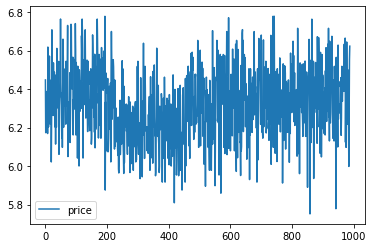

In [45]:
Data.plot(y='price')
plt.show()

In [47]:
dummie = pd.get_dummies(Data)

dummie.to_latex(r'table/dummieTablet.tex')

dummie

,price,m2,rooms,toilets,floor,building_units,age,location_KBH K,location_KBH N,location_KBH V,location_KBH Ø
0,6.447158,81,3,1,1,20,1888,1,0,0,0
1,6.173186,77,2,1,5,11,1880,1,0,0,0
2,6.288920,77,2,1,1,12,1898,1,0,0,0
3,6.387147,95,4,1,1,43,2005,1,0,0,0
4,6.277609,56,1,1,3,4,1850,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
983,6.184691,64,2,1,5,249,1974,0,0,0,1
984,5.997823,50,1,1,1,76,1934,0,0,0,1
985,6.300813,90,3,1,0,16,1906,0,0,0,1
986,6.553276,110,4,1,6,100,2007,0,0,0,1


In [7]:
model = sm.OLS(endogen,X,hasconst=True)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     215.0
Date:                Tue, 27 Oct 2020   Prob (F-statistic):          4.43e-193
Time:                        16:59:55   Log-Likelihood:                 726.81
No. Observations:                 988   AIC:                            -1438.
Df Residuals:                     980   BIC:                            -1398.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.8201      0.015    328.666      0.000       4.791       4.849
m2                 0.0034      0.000     17.417      0.000       0.003       0.004
rooms              0.0111      0.006      1.908      0.057      -0.000       0.023
toilets           -0.0463      0.018     -2.620      0.009      -0.081      -0.012
floor              0.0105      0.002      4.583      0.000       0.006       0.015
location_KBH K     1.2534      0.008    160.557      0.000       1.238       1.269
location_KBH N     1.1515      0.008    152.519      0.000       1.137       1.166
location_KBH V     1.1972      0.009    132.383      0.000       1.179       1.215
location_KBH Ø     1.2179      0.007    174.702      0.000       1.204       1.232
==============================================================================
Omnibus:                      118.861   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.208
Skew:                          -0.683   Prob(JB):                     4.72e-60
Kurtosis:                       5.184   Cond. No.                     9.80e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.66e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [19]:
exogen2 = dummie.drop(['price','age','building_units'],axis=1)
endogen2 = dummie.price
exogen2 = sm.add_constant(exogen2)
exogen2

,const,m2,rooms,toilets,floor,location_KBH K,location_KBH N,location_KBH V,location_KBH Ø
0,1.0,81,3,1,1,1,0,0,0
1,1.0,77,2,1,5,1,0,0,0
2,1.0,77,2,1,1,1,0,0,0
3,1.0,95,4,1,1,1,0,0,0
4,1.0,56,1,1,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...
983,1.0,64,2,1,5,0,0,0,1
984,1.0,50,1,1,1,0,0,0,1
985,1.0,90,3,1,0,0,0,0,1
986,1.0,110,4,1,6,0,0,0,1


In [27]:
model2 = sm.OLS(endogen2,exogen2,hasconst=True)
result =model2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     215.0
Date:                Tue, 27 Oct 2020   Prob (F-statistic):          4.43e-193
Time:                        14:16:49   Log-Likelihood:                 726.81
No. Observations:                 988   AIC:                            -1438.
Df Residuals:                     980   BIC:                            -1398.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.8201      0.015    328.666      0.000       4.791       4.849
m2                 0.0034      0.000     17.417      0.000       0.003       0.004
rooms              0.0111      0.006      1.908      0.057      -0.000       0.023
toilets           -0.0463      0.018     -2.620      0.009      -0.081      -0.012
floor              0.0105      0.002      4.583      0.000       0.006       0.015
location_KBH K     1.2534      0.008    160.557      0.000       1.238       1.269
location_KBH N     1.1515      0.008    152.519      0.000       1.137       1.166
location_KBH V     1.1972      0.009    132.383      0.000       1.179       1.215
location_KBH Ø     1.2179      0.007    174.702      0.000       1.204       1.232
==============================================================================
Omnibus:                      118.861   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.208
Skew:                          -0.683   Prob(JB):                     4.72e-60
Kurtosis:                       5.184   Cond. No.                     9.80e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.66e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""